In [17]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
df = pd.read_csv('data/training_data_ht2025.csv')
import matplotlib.pyplot as plt

In [9]:
#Data preprocessing 
df['is_raining'] = (df['precip'] > 0).astype(int)


# columns = ['hour_of_day','increase_stock','humidity','summertime','temp','weekday','day_of_week','is_raining']
columns=df.columns
df = df[columns]
y_mask = 'high_bike_demand'
df['increase_stock'] = (df['increase_stock'] == y_mask).astype(int)
df_train,df_test = train_test_split(df, test_size=0.3, shuffle=True)

In [10]:
x_train,y_train = df_train.drop(columns=['increase_stock',]), df_train['increase_stock']
x_test,y_test = df_test.drop(columns=['increase_stock',]), df_test['increase_stock']

In [11]:
param_grid = {
    'C': np.logspace(-10,50,30),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' works well with L1 and L2 for small datasets
}
log_reg = LogisticRegression(random_state=2137,max_iter=2000)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=10, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1 
)
grid_search.fit(x_train, y_train)

# --- 5. Retrieve the Best Results ---
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best CV Score (Accuracy): {grid_search.best_score_:.4f}")

# --- 6. Final Model Evaluation ---
# The best estimator is the model trained with the best parameters on all of X_train.
best_model = grid_search.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ..............C=1e-10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=1e-10, penalty=l1, so

In [12]:
y_pred_test = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, y_pred_test)
final_accuracy

0.8604166666666667

In [13]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay,confusion_matrix,ConfusionMatrixDisplay

In [14]:
y_proba = best_model.predict_proba(x_test)[:,1]
y_pred = best_model.predict(x_test)
auc_score = roc_auc_score(y_test, y_proba)

cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

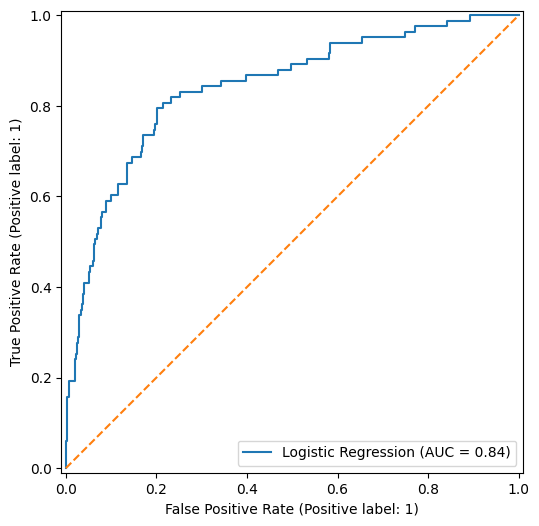

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(
    best_model,         # Your final fitted model
    x_test,             # Test features
    y_test,             # True test labels
    name='Logistic Regression',
    ax=ax,              # Pass the axes object
)
ax.plot([0,1],[0,1], '--')

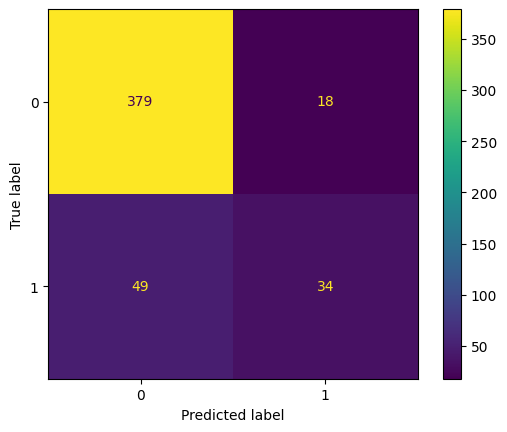

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_model.classes_)
disp.plot()
